<a href="https://colab.research.google.com/github/preetmodi/Credit-Risk-Analytics/blob/main/WoE_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo echo -ne '\n' | sudo add-apt-repository ppa:alessandro-strada/ppa >/dev/null 2>&1 # note: >/dev/null 2>&1 is used to supress printing
!sudo apt update >/dev/null 2>&1
!sudo apt install google-drive-ocamlfuse >/dev/null 2>&1
!google-drive-ocamlfuse
!sudo apt-get install w3m >/dev/null 2>&1 # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop >/dev/null 2>&1 # to set default browser 
%cd /content
!mkdir gdrive
%cd gdrive
!mkdir "My Drive"
!google-drive-ocamlfuse "/content/gdrive/My Drive"
     

/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force&state=BBpUjf37Nbx7MepdKiP7XuU3TbzPqDyCFrfTJxhRkT4'
/bin/sh: 1: firefox: not found
/bin/sh: 1: google-chrome: not found
/bin/sh: 1: chromium-browser: not found
/bin/sh: 1: open: not found
Cannot retrieve auth tokens.
Failure("Error opening URL:https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.com%2Foauth2callback&scope=https%3A%2F%2Fwww.

In [2]:
%cd /content/gdrive/My Drive/Data/

/content/gdrive/My Drive/Data


In [3]:
!pip install git+https://github.com/CBravoR/scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/CBravoR/scorecardpy to /tmp/pip-req-build-bd4mh6tt
  Running command git clone --filter=blob:none --quiet https://github.com/CBravoR/scorecardpy /tmp/pip-req-build-bd4mh6tt
  Resolved https://github.com/CBravoR/scorecardpy to commit 03ec28470391e5c950580ad9ac4877ca33f05fce
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.3-py3-none-any.whl size=59549 sha256=5e076b04632f0850207b7fd42c3f0dff89e10f60354976087f60fea92490a4e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-xzvtl6ml/wheels/61/36/7f/76fa329f36d896910f2251f5cfd54094c722e088b633e47f6f
Successfully built scorecardpy


In [4]:
import scorecardpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline
random.seed(251256517)

In [5]:
df_train = pd.read_csv("train_mean.csv",index_col=0, low_memory=False)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896430 entries, 0 to 1280645
Data columns (total 75 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              896430 non-null  int64  
 1   loan_amnt                       896430 non-null  float64
 2   funded_amnt                     896430 non-null  float64
 3   funded_amnt_inv                 896430 non-null  float64
 4   term                            896430 non-null  object 
 5   installment                     896430 non-null  float64
 6   home_ownership                  896430 non-null  object 
 7   purpose                         896430 non-null  object 
 8   zip_code                        896430 non-null  object 
 9   addr_state                      896430 non-null  object 
 10  dti                             896430 non-null  float64
 11  delinq_2yrs                     896430 non-null  float64
 12  earliest_cr_lin

In [7]:
df_train.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,home_ownership,purpose,zip_code,addr_state,...,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,Default,bank_dlq,il_acc,payment_history,collateral_coverage_ratio
0,68355089,24700.0,24700.0,24700.0,36 months,820.28,MORTGAGE,small_business,577xx,SD,...,0.0,314017.0,39475.0,79300.0,24667.0,0,0,1,0.631895,0.998664
1,68341763,20000.0,20000.0,20000.0,60 months,432.66,MORTGAGE,home_improvement,605xx,IL,...,0.0,218418.0,18696.0,6200.0,14877.0,0,0,1,0.888889,0.743850
5,68338832,1400.0,1400.0,1400.0,36 months,47.10,MORTGAGE,other,275xx,NC,...,0.0,372109.0,75258.0,34500.0,55501.0,0,0,1,0.666667,39.643571
6,66624733,18000.0,18000.0,18000.0,60 months,471.70,RENT,debt_consolidation,916xx,CA,...,0.0,65819.0,36247.0,10300.0,31319.0,1,0,1,0.740741,1.739944
8,68009401,16000.0,16000.0,16000.0,60 months,379.39,MORTGAGE,credit_card,297xx,SC,...,2.0,298100.0,31329.0,281300.0,13400.0,0,1,1,0.367947,0.837500


In [ ]:
print(df_train.dtypes)

In [ ]:
df_train['home_ownership']. unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

## **Splitting Variables into Groups:**

In [16]:
# Group 1 
group1_vars = ['loan_amnt', 'term', 'installment', 'home_ownership', 'annual_inc_joint']

# Group 2
group2_vars = ['purpose', 'dti']

# Group 3
group3_vars = ['delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths']

# Group 4
group4_vars = ['open_acc', 'pub_rec', 'revol_bal','revol_util', 'total_acc']

# List of the first 20 variables
first_20_vars = ['loan_amnt', 'term', 'installment', 'home_ownership',  
                 'purpose', 'dti', 
                 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 
                 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc']


## **DATA VISUALIZATION:**

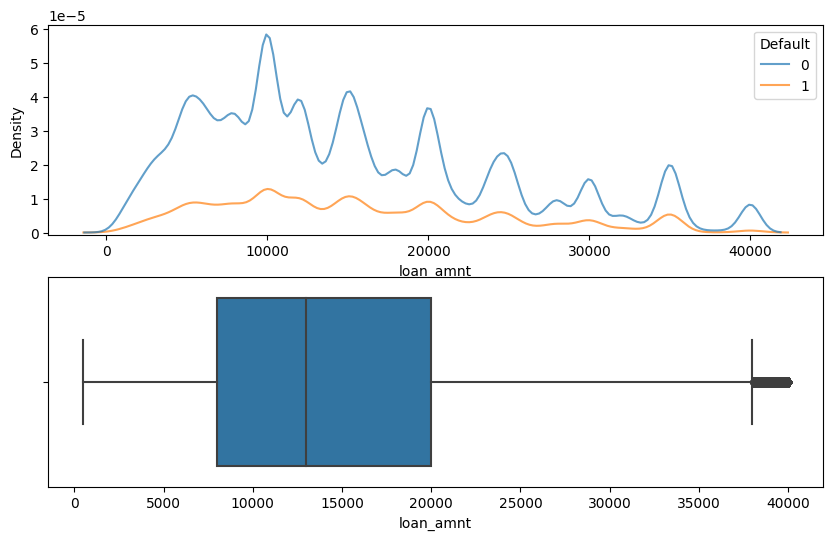

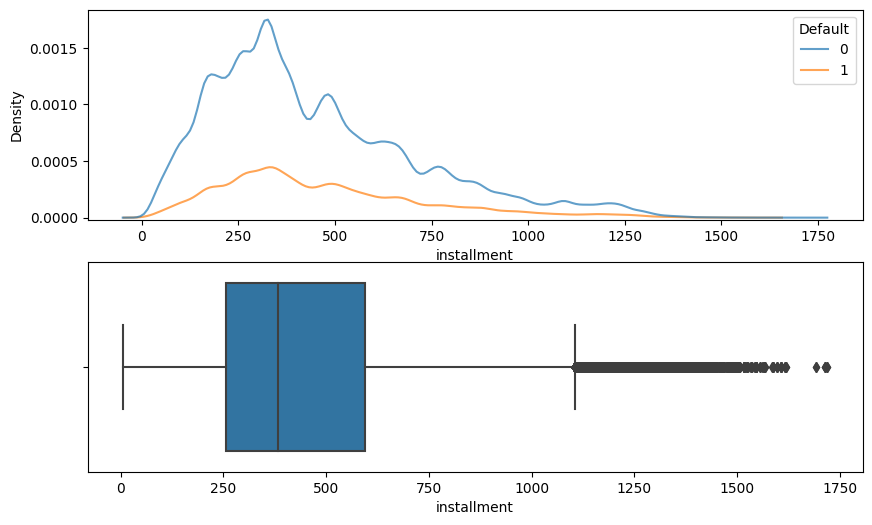

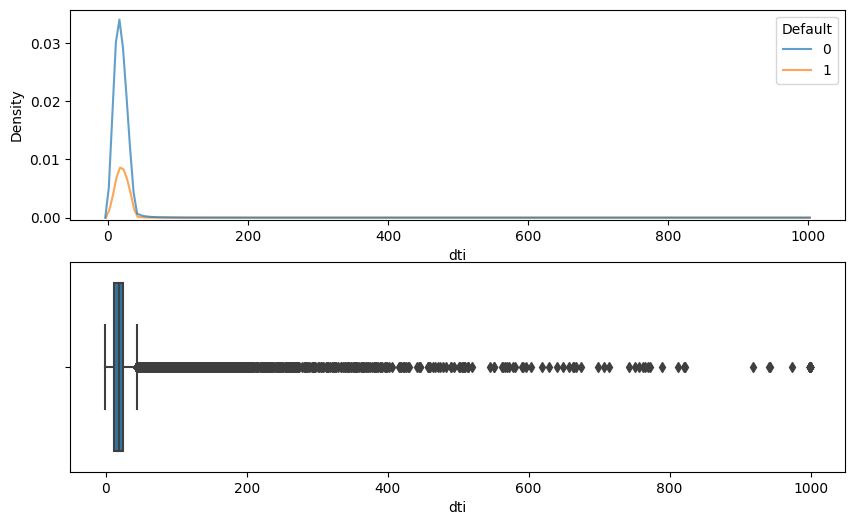

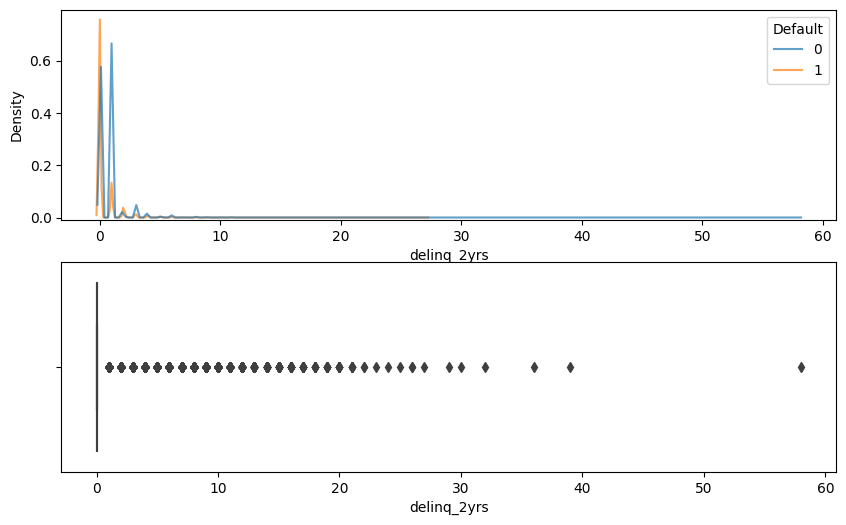

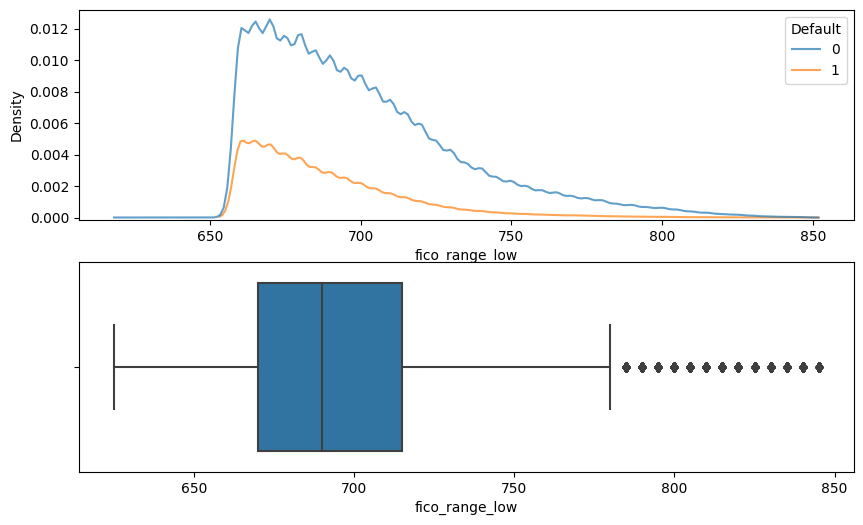

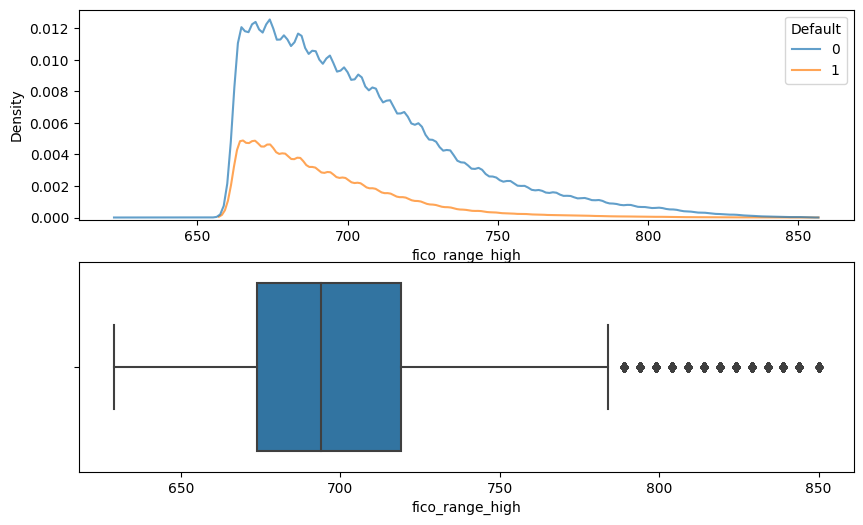

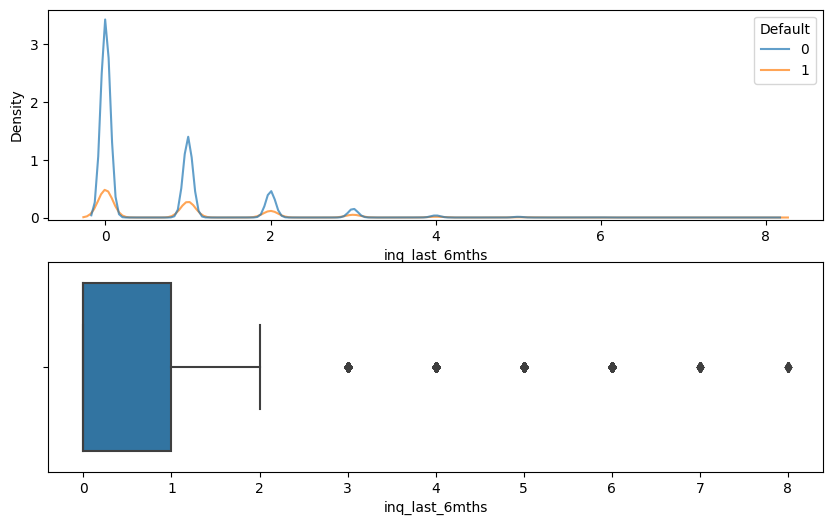

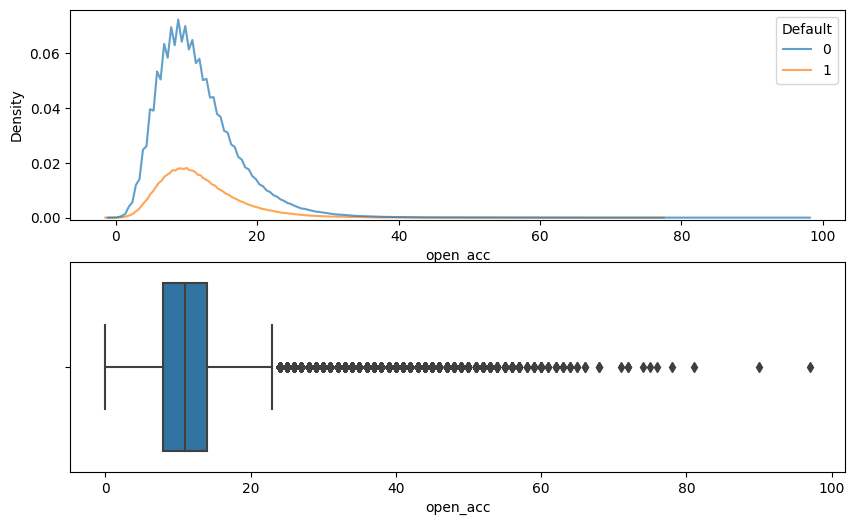

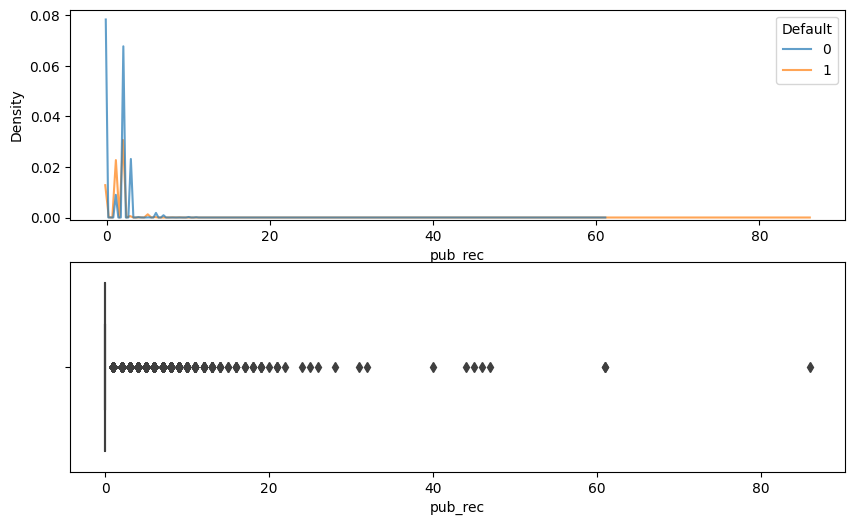

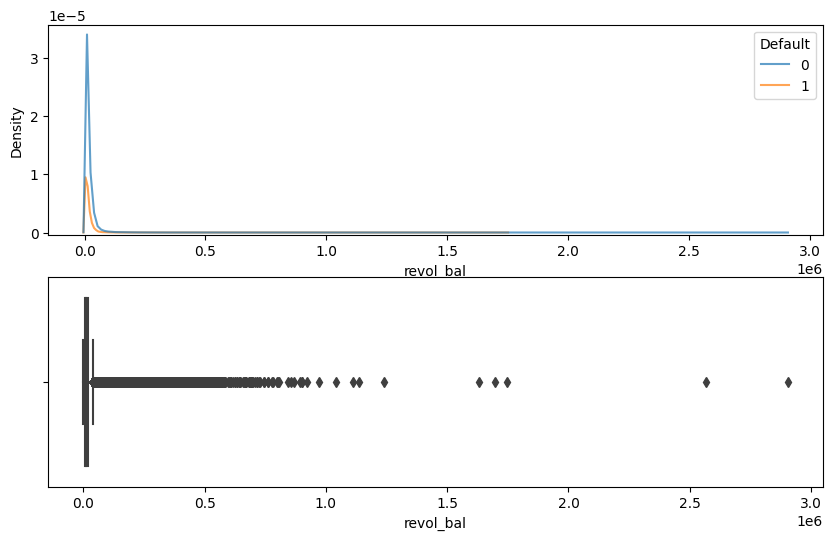

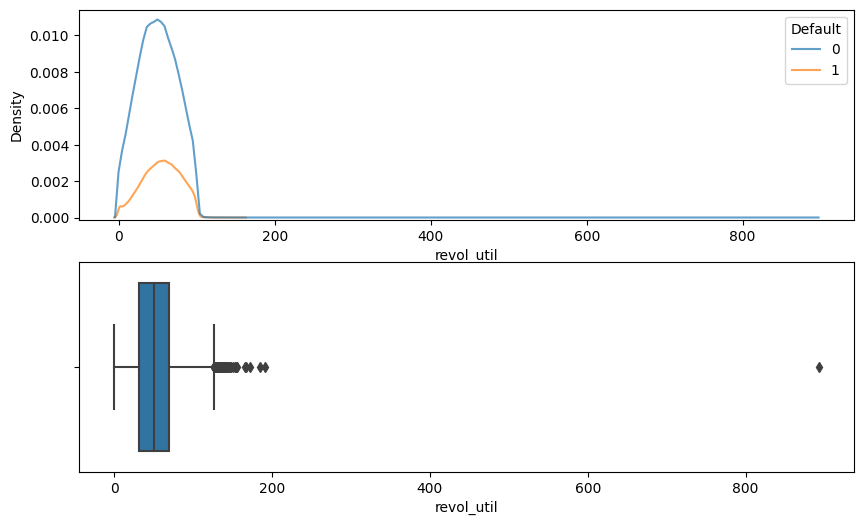

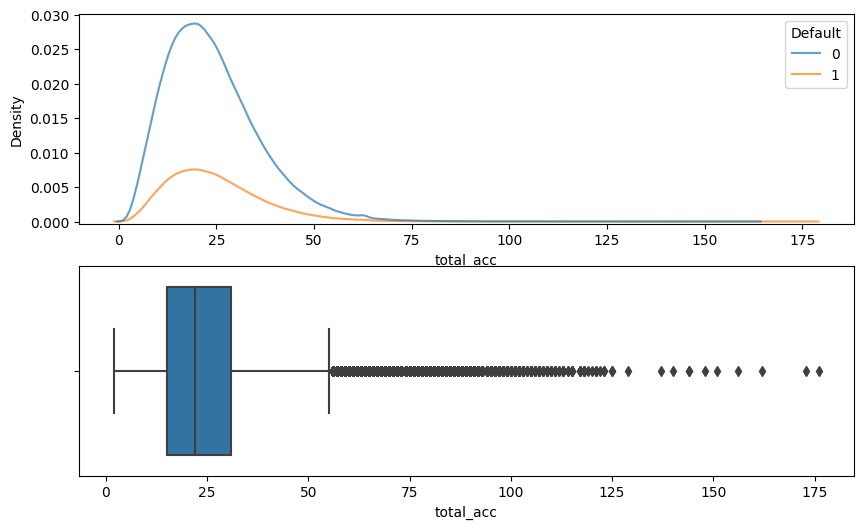

In [17]:
# Filter the first 20 variables by numerical columns only
# num_list = [col for col in first_20_vars if df_train[col].dtype in ['float64', 'int64']]

for var in first_20_vars:
    if df_train[var].dtype in ['float64', 'int64']:
      fig, g = plt.subplots(2, 1, figsize=(10, 6))
      sns.kdeplot(data=df_train, x=var, hue="Default", alpha=0.7, ax=g[0])
      ymin, ymax = g[0].get_ylim()
      g[0].set_ylim(ymin=ymin - (ymax / 100), ymax=ymax)
      sns.boxplot(data=df_train, x=var, ax=g[1])
      plt.show()

In [ ]:
for var in first_20_vars:
    if df_train[var].dtype in ['float64', 'int64']:
        plt.figure()
        sns.boxplot(x=df_train[var])
        plt.title(f'Box plot for {var}')
    else:
        plt.figure()
        sns.countplot(x=df_train[var])
        plt.title(f'Count plot for {var}')
    plt.show()

In [24]:
def preprocess_data(df):
    # Convert non-numeric columns to string
    non_numeric_cols = df.select_dtypes(include=['object']).columns
    df[non_numeric_cols] = df[non_numeric_cols].astype('str')

    # Convert numeric columns to float and replace NaNs with a suitable value
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].astype('float64')
    df[numeric_cols] = df[numeric_cols].fillna(-999999)

    return df


In [25]:
df_train_preprocessed = preprocess_data(df_train.copy())

## **WoE Calculations BEFORE outlier analysis:**

In [ ]:
bins = sc.woebin(df_train_preprocessed, y='Default',
                 x=group1_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

In [ ]:
import seaborn as sns

sc.woebin_plot(bins)

In [ ]:
bins2 = sc.woebin(df_train_preprocessed, y='Default',
                 x=group2_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

In [ ]:
sc.woebin_plot(bins2)

In [ ]:
bins3 = sc.woebin(df_train_preprocessed, y='Default',
                 x=group3_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

In [ ]:
sc.woebin_plot(bins3)

In [ ]:
bins4 = sc.woebin(df_train_preprocessed, y='Default',
                 x=group4_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.1,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=3,  # Maximum number of bins
                 method='tree'
                 )

In [ ]:
sc.woebin_plot(bins4)

## **Outlier analysis:**

In [22]:
def remove_outliers(data, cutoffs):
  for column, cutoff_value in cutoffs.items():
    rows_before = len(data)
    data = data[data[column] <= cutoff_value]
    rows_after = len(data)
    rows_removed = rows_before - rows_after
    print(f"Rows removed for {column}: {rows_removed}")
  return data

# cutoff values for each variable
cutoffs = {
'installment': 1650,
'dti': 900,
'delinq_2yrs': 30,
'open_acc': 75,
'pub_rec': 40,
'revol_bal': 1500000,
'revol_util': 200,
'total_acc': 135,
    }

# Remove the outliers
df_train_no_outliers = remove_outliers(df_train, cutoffs)

Rows removed for installment: 7
Rows removed for dti: 45
Rows removed for delinq_2yrs: 4
Rows removed for open_acc: 5
Rows removed for pub_rec: 7
Rows removed for revol_bal: 5
Rows removed for revol_util: 1
Rows removed for total_acc: 10


In [26]:
df_train_preprocessed_NO = preprocess_data(df_train_no_outliers.copy())

In [ ]:
df_train_preprocessed_NO.info()

## **WoE Calculations AFTER outlier analysis:**

In [27]:
bins_no = sc.woebin(df_train_preprocessed_NO, y='Default',
                 x=first_20_vars,  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 896346 rows and 16 columns in 00:01:34


{'loan_amnt': <Figure size 640x480 with 2 Axes>,
 'term': <Figure size 640x480 with 2 Axes>,
 'installment': <Figure size 640x480 with 2 Axes>,
 'home_ownership': <Figure size 640x480 with 2 Axes>,
 'purpose': <Figure size 640x480 with 2 Axes>,
 'dti': <Figure size 640x480 with 2 Axes>,
 'delinq_2yrs': <Figure size 640x480 with 2 Axes>,
 'fico_range_low': <Figure size 640x480 with 2 Axes>,
 'fico_range_high': <Figure size 640x480 with 2 Axes>,
 'inq_last_6mths': <Figure size 640x480 with 2 Axes>,
 'open_acc': <Figure size 640x480 with 2 Axes>,
 'pub_rec': <Figure size 640x480 with 2 Axes>,
 'revol_bal': <Figure size 640x480 with 2 Axes>,
 'revol_util': <Figure size 640x480 with 2 Axes>,
 'total_acc': <Figure size 640x480 with 2 Axes>}

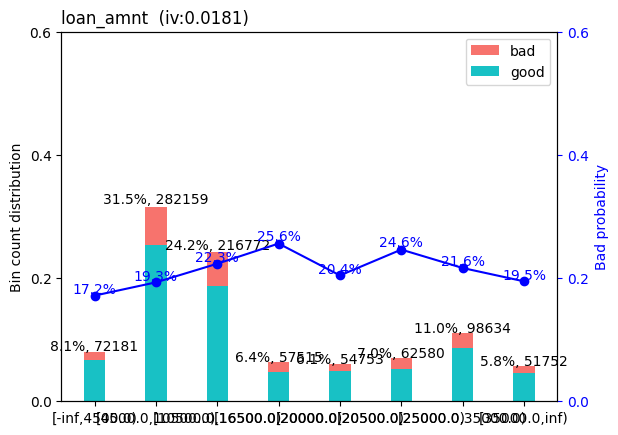

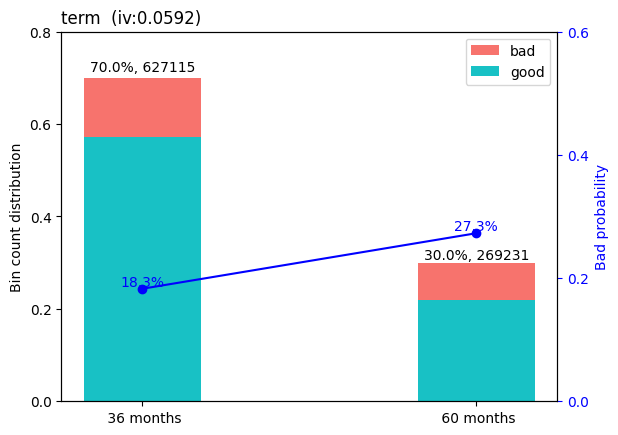

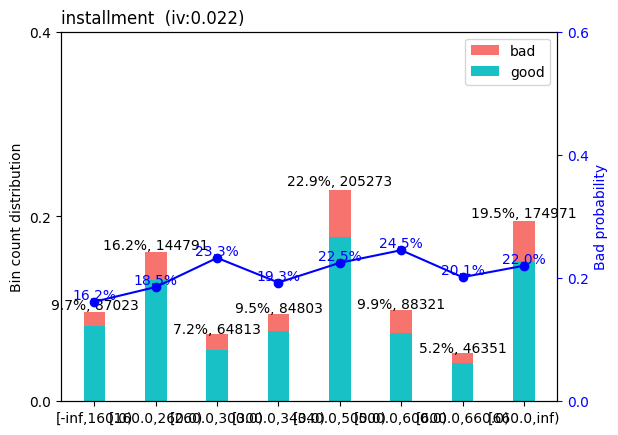

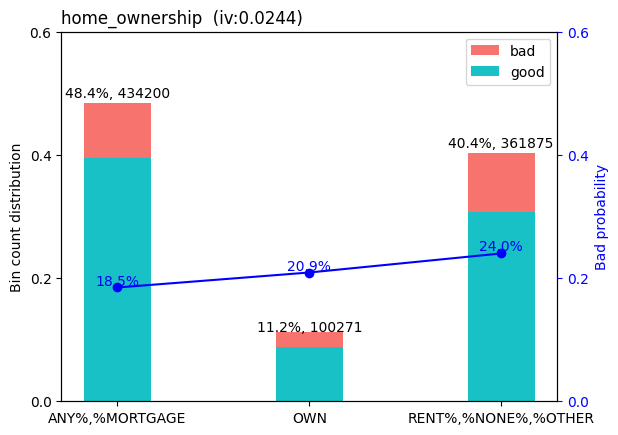

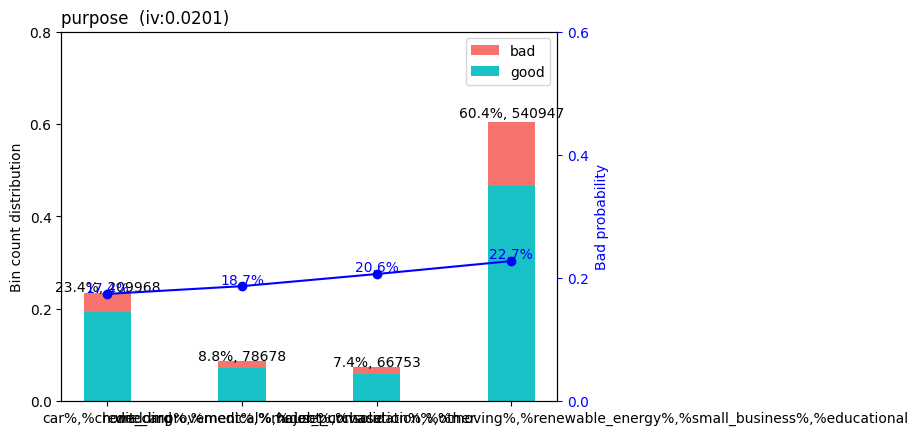

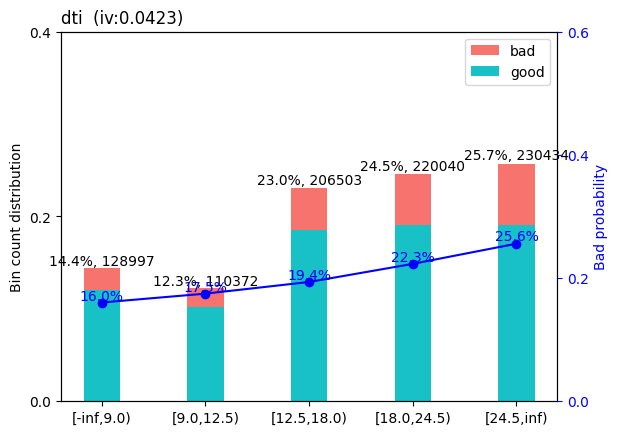

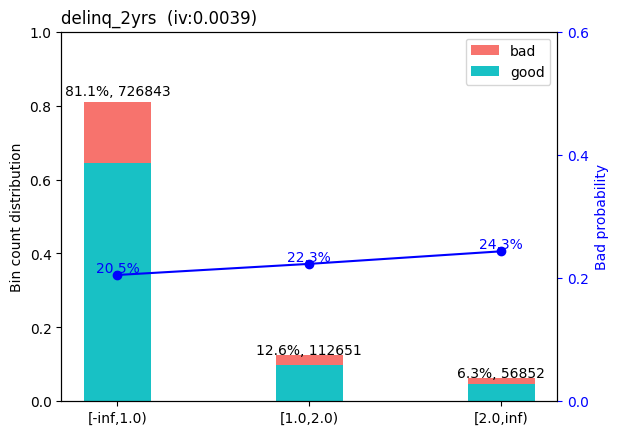

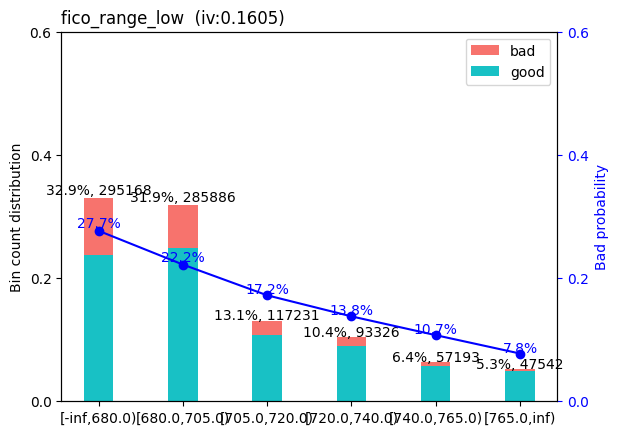

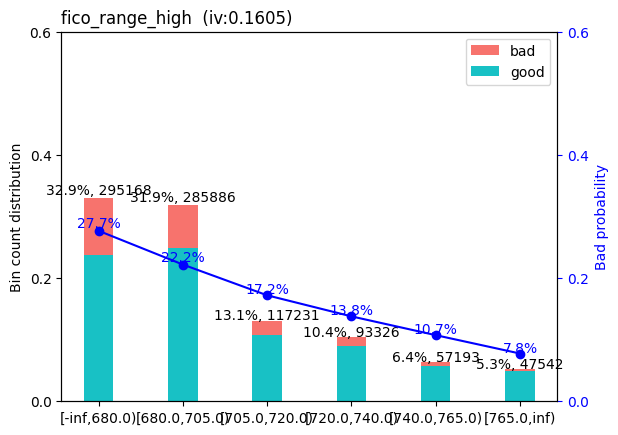

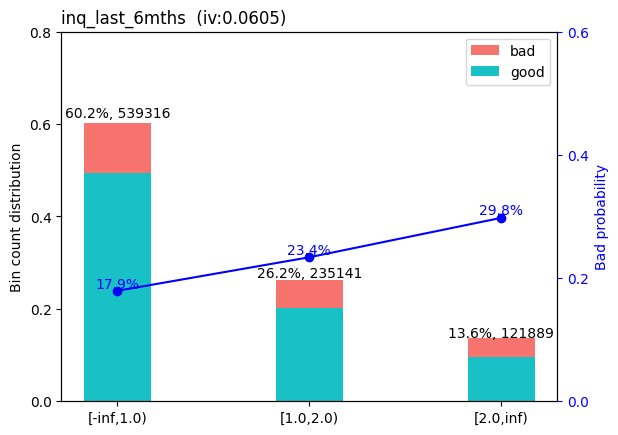

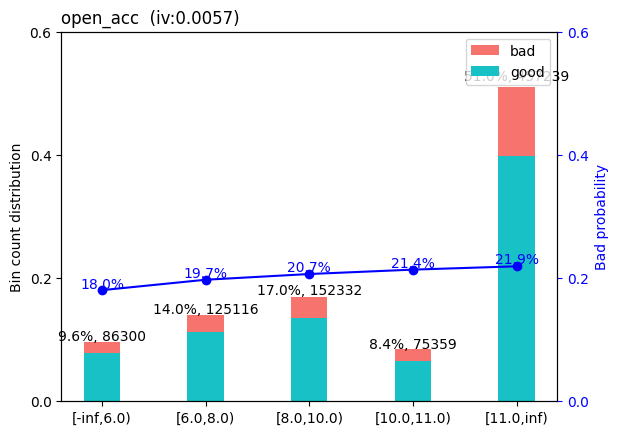

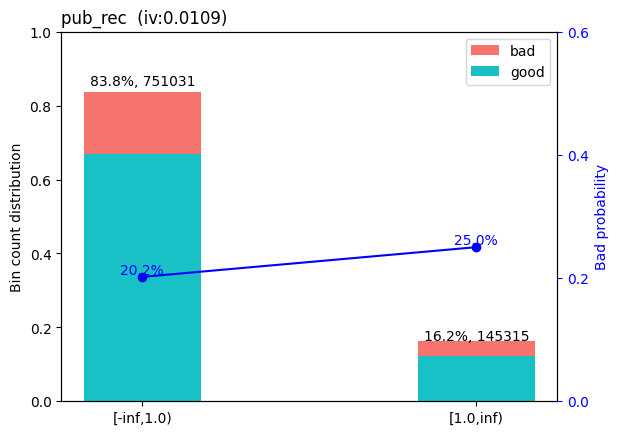

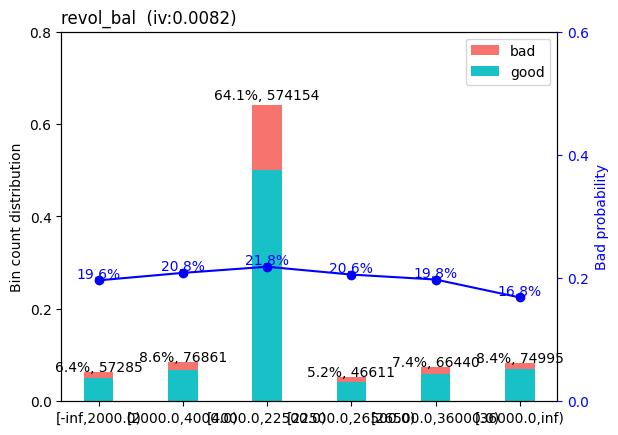

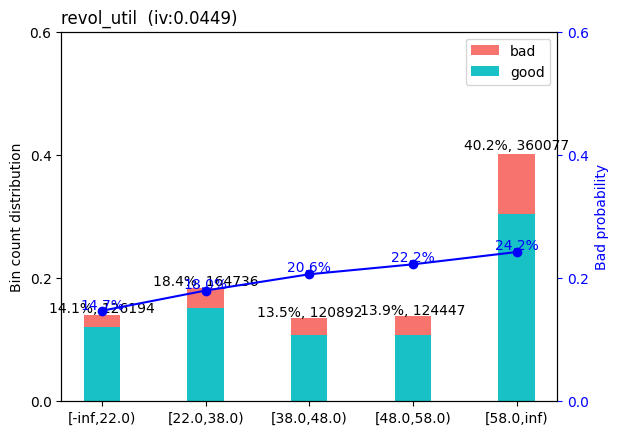

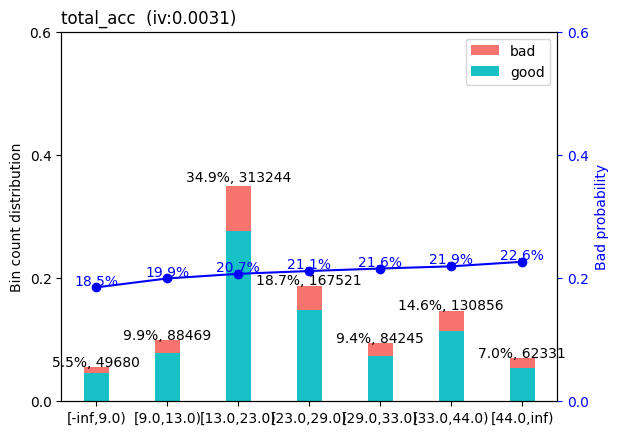

In [28]:
sc.woebin_plot(bins_no)

In [29]:
bins_no

{'loan_amnt':     variable                bin   count  count_distr    good    bad   badprob  \
 0  loan_amnt      [-inf,4500.0)   72181     0.080528   59798  12383  0.171555   
 1  loan_amnt   [4500.0,10500.0)  282159     0.314788  227685  54474  0.193061   
 2  loan_amnt  [10500.0,16500.0)  216772     0.241840  168366  48406  0.223304   
 3  loan_amnt  [16500.0,20000.0)   57515     0.064166   42788  14727  0.256055   
 4  loan_amnt  [20000.0,20500.0)   54753     0.061085   43565  11188  0.204336   
 5  loan_amnt  [20500.0,25000.0)   62580     0.069817   47170  15410  0.246245   
 6  loan_amnt  [25000.0,35000.0)   98634     0.110040   77293  21341  0.216366   
 7  loan_amnt      [35000.0,inf)   51752     0.057737   41675  10077  0.194717   
 
         woe    bin_iv  total_iv   breaks  is_special_values  
 0 -0.248197  0.004605  0.018054   4500.0              False  
 1 -0.103789  0.003289  0.018054  10500.0              False  
 2  0.079934  0.001581  0.018054  16500.0              Fal

-------- 1/15 loan_amnt --------
>>> dt[loan_amnt].describe(): 
count    896346.000000
mean      15140.773568
std        9155.941195
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       40000.000000
Name: loan_amnt, dtype: float64 



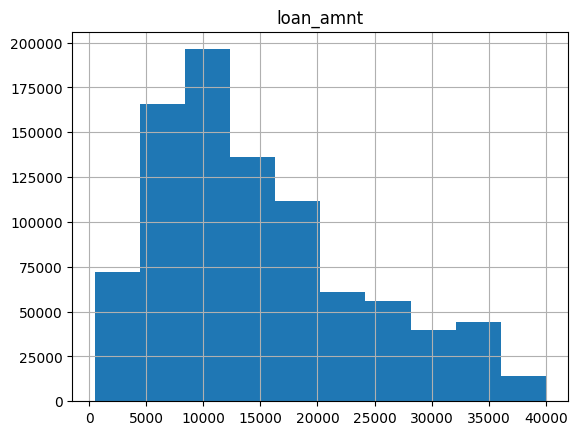

>>> Current breaks:
4500.0,10500.0,16500.0,20000.0,20500.0,25000.0,35000.0 



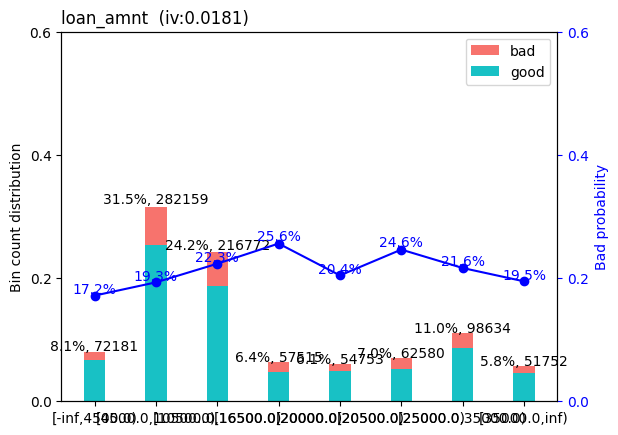

>>> Adjust breaks for (1/15) loan_amnt?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/15 term --------
>>> dt[term].describe(): 
count         896346
unique             2
top        36 months
freq          627115
Name: term, dtype: object 

>>> dt[term].value_counts(): 
 36 months    627115
 60 months    269231
Name: term, dtype: int64 

>>> Current breaks:
' 36 months',' 60 months' 



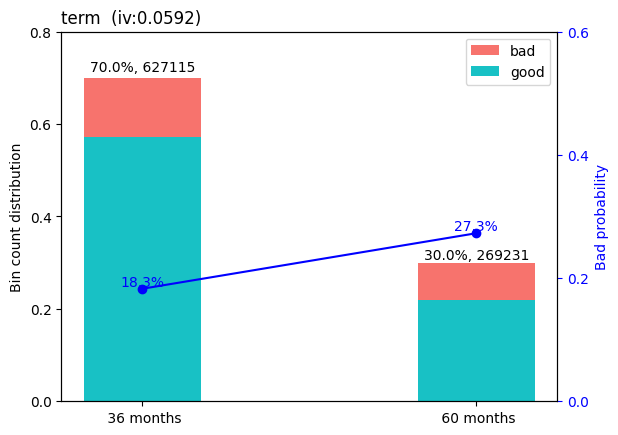

>>> Adjust breaks for (2/15) term?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/15 installment --------
>>> dt[installment].describe(): 
count    896346.000000
mean        449.127535
std         267.248963
min           4.930000
25%         255.710000
50%         382.360000
75%         595.410000
max        1618.240000
Name: installment, dtype: float64 



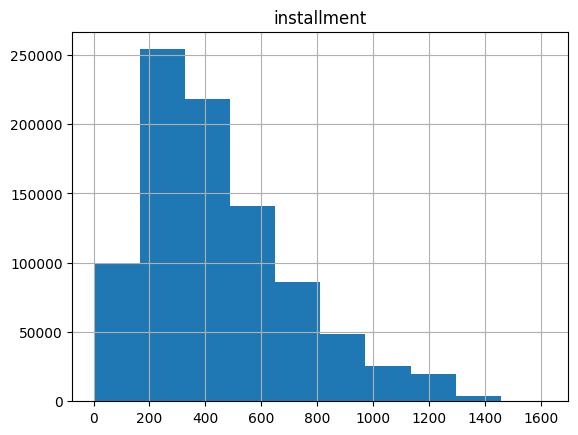

>>> Current breaks:
160.0,260.0,300.0,340.0,500.0,600.0,660.0 



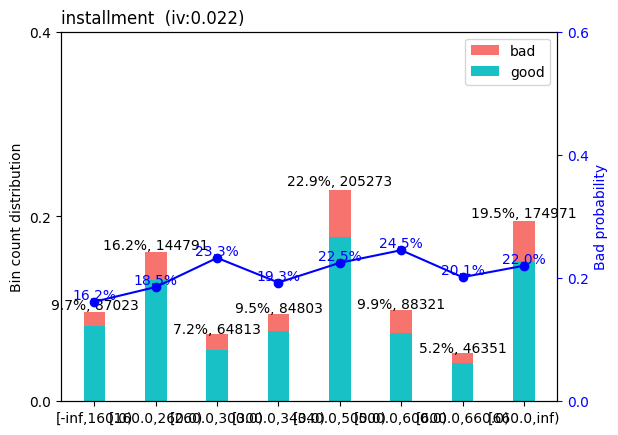

>>> Adjust breaks for (3/15) installment?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/15 home_ownership --------
>>> dt[home_ownership].describe(): 
count       896346
unique           6
top       MORTGAGE
freq        433837
Name: home_ownership, dtype: object 

>>> dt[home_ownership].value_counts(): 
MORTGAGE    433837
RENT        361807
OWN         100271
ANY            363
OTHER           52
NONE            16
Name: home_ownership, dtype: int64 

>>> Current breaks:
'ANY%,%MORTGAGE','OWN','RENT%,%NONE%,%OTHER' 



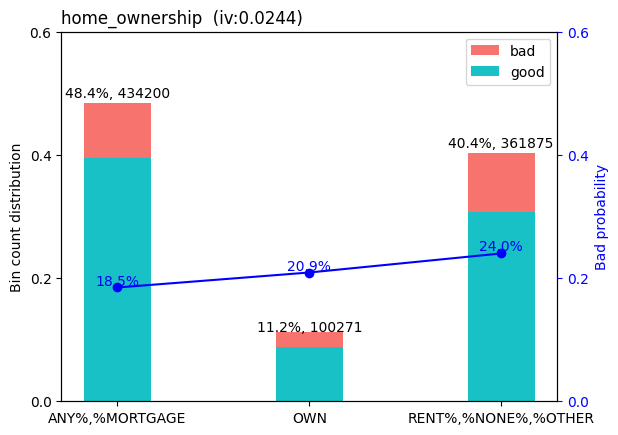

>>> Adjust breaks for (4/15) home_ownership?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/15 purpose --------
>>> dt[purpose].describe(): 
count                 896346
unique                    14
top       debt_consolidation
freq                  511821
Name: purpose, dtype: object 

>>> dt[purpose].value_counts(): 
debt_consolidation    511821
credit_card           200727
home_improvement       58775
other                  55112
major_purchase         19903
medical                10846
small_business         10441
car                     9241
moving                  6173
vacation                6044
house                   5597
wedding                  920
renewable_energy         620
educational              126
Name: purpose, dtype: int64 

>>> Current breaks:
'car%,%credit_card','home_improvement%,%major_purchase','house%,%vacation%,%other','wedding%,%medical%,%debt_consolidation%,%moving%,%renewable_energy%,%small_business%,%educational' 



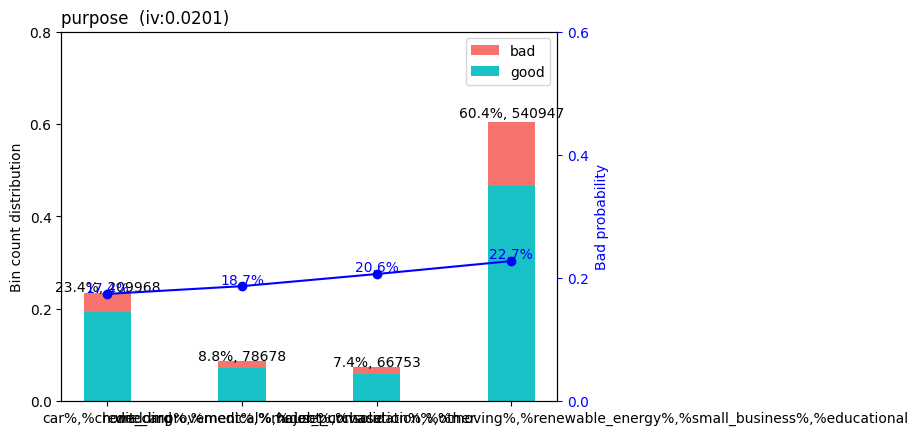

>>> Adjust breaks for (5/15) purpose?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/15 dti --------
>>> dt[dti].describe(): 
count    896346.000000
mean         18.928218
std          11.767266
min          -1.000000
25%          12.060000
50%          18.050000
75%          24.720000
max         822.000000
Name: dti, dtype: float64 



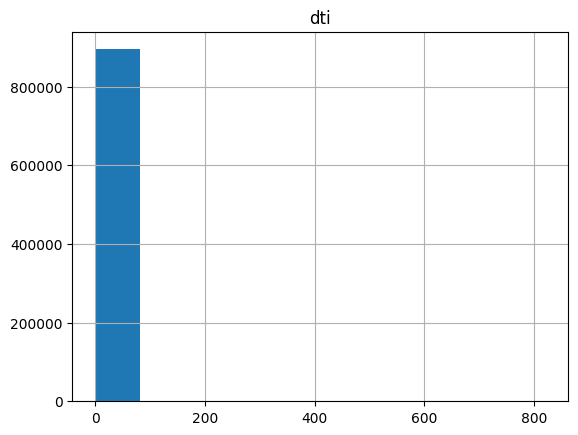

>>> Current breaks:
9.0,12.5,18.0,24.5 



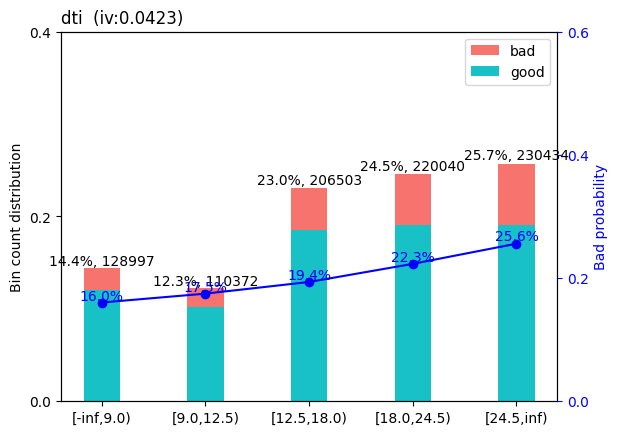

>>> Adjust breaks for (6/15) dti?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/15 delinq_2yrs --------
>>> dt[delinq_2yrs].describe(): 
count    896346.000000
mean          0.312990
std           0.878704
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: delinq_2yrs, dtype: float64 



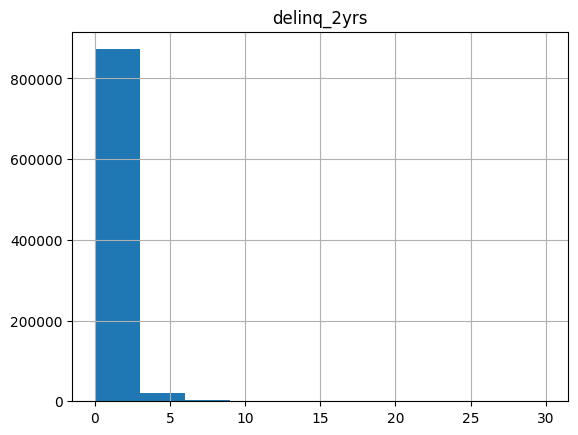

>>> Current breaks:
1.0,2.0 



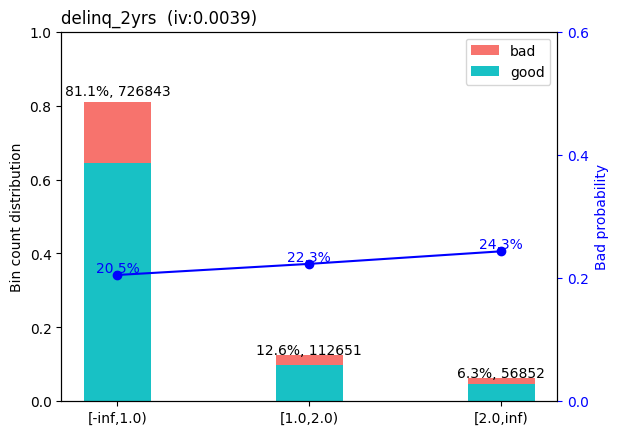

>>> Adjust breaks for (7/15) delinq_2yrs?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/15 fico_range_low --------
>>> dt[fico_range_low].describe(): 
count    896346.000000
mean        697.383577
std          32.493467
min         625.000000
25%         670.000000
50%         690.000000
75%         715.000000
max         845.000000
Name: fico_range_low, dtype: float64 



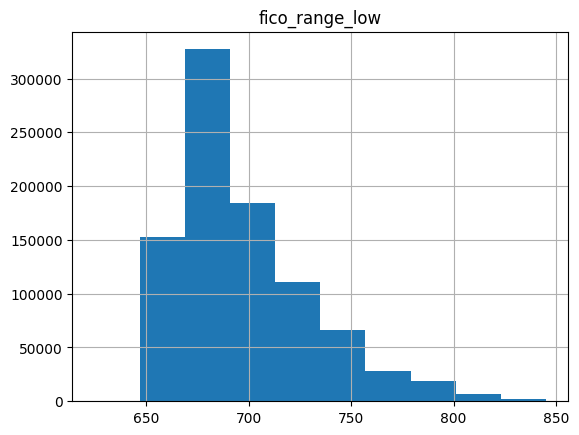

>>> Current breaks:
680.0,705.0,720.0,740.0,765.0 



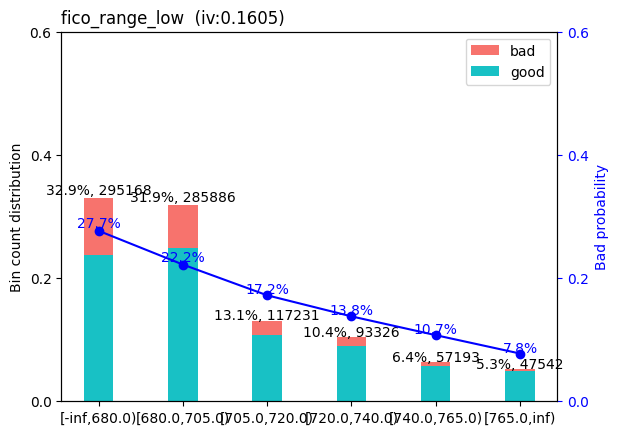

>>> Adjust breaks for (8/15) fico_range_low?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/15 fico_range_high --------
>>> dt[fico_range_high].describe(): 
count    896346.000000
mean        701.383752
std          32.494265
min         629.000000
25%         674.000000
50%         694.000000
75%         719.000000
max         850.000000
Name: fico_range_high, dtype: float64 



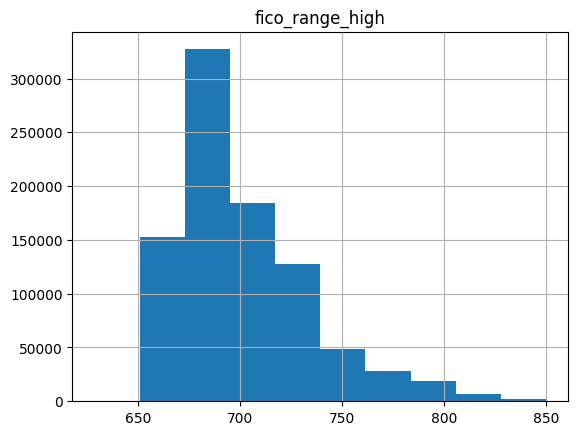

>>> Current breaks:
680.0,705.0,720.0,740.0,765.0 



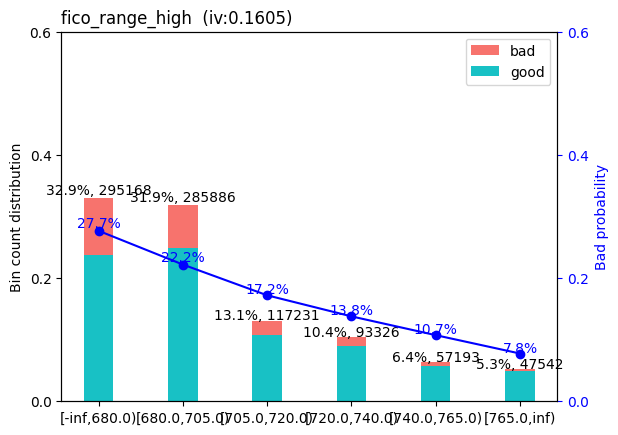

>>> Adjust breaks for (9/15) fico_range_high?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/15 inq_last_6mths --------
>>> dt[inq_last_6mths].describe(): 
count    896346.000000
mean          0.593840
std           0.889313
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: inq_last_6mths, dtype: float64 

>>> dt[inq_last_6mths].value_counts(): 
0.0    539316
1.0    235141
2.0     82311
3.0     29212
4.0      7410
5.0      2530
6.0       395
7.0        21
8.0        10
Name: inq_last_6mths, dtype: int64 

>>> Current breaks:
1.0,2.0 



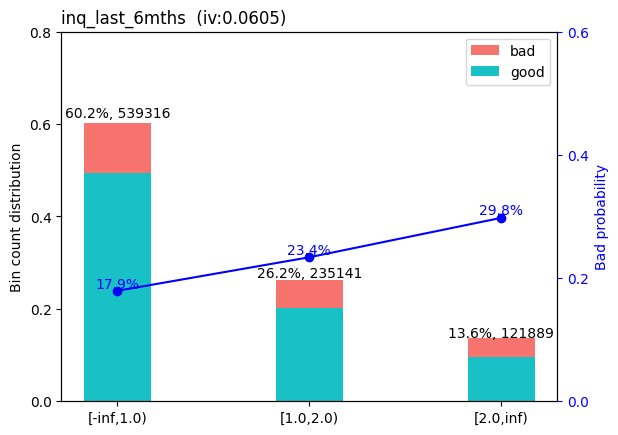

>>> Adjust breaks for (10/15) inq_last_6mths?
1: next 
2: yes 
3: back
Selection: 1
-------- 11/15 open_acc --------
>>> dt[open_acc].describe(): 
count    896346.000000
mean         11.644012
std           5.641100
min           0.000000
25%           8.000000
50%          11.000000
75%          14.000000
max          75.000000
Name: open_acc, dtype: float64 



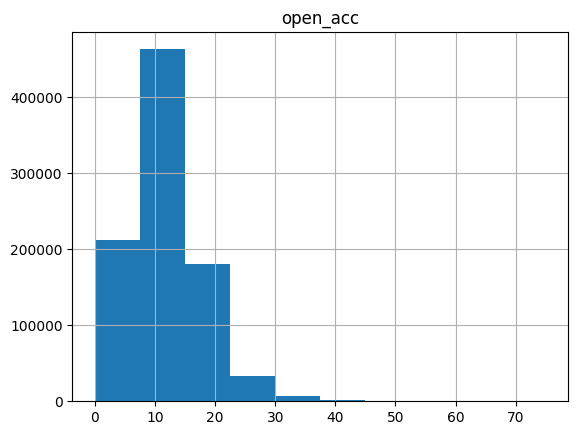

>>> Current breaks:
6.0,8.0,10.0,11.0 



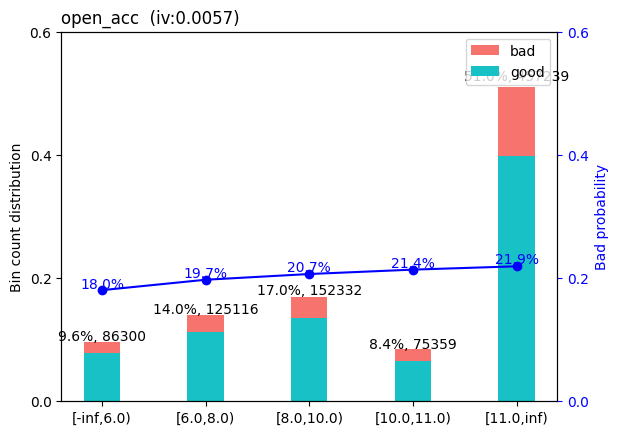

>>> Adjust breaks for (11/15) open_acc?
1: next 
2: yes 
3: back
Selection: 1
-------- 12/15 pub_rec --------
>>> dt[pub_rec].describe(): 
count    896346.000000
mean          0.202230
std           0.561085
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          40.000000
Name: pub_rec, dtype: float64 



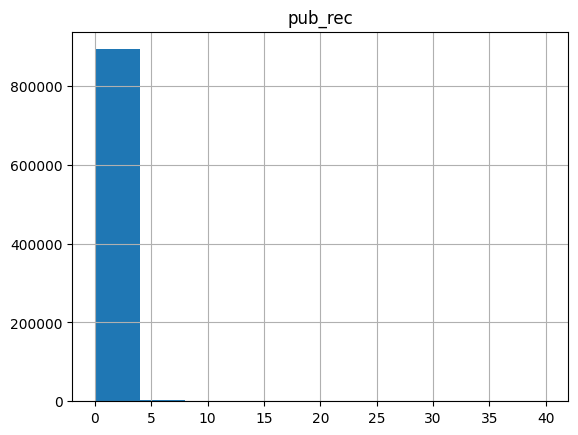

>>> Current breaks:
1.0 



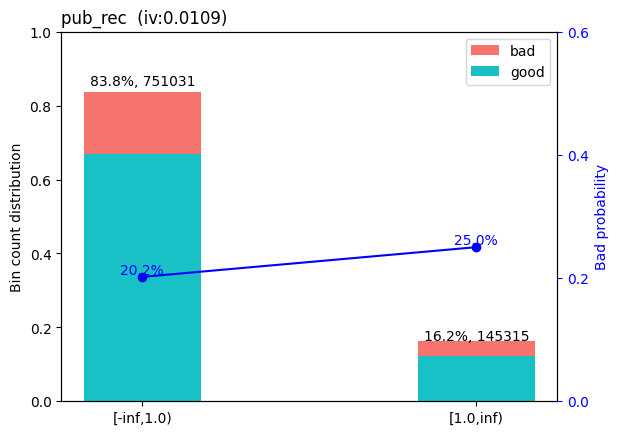

>>> Adjust breaks for (12/15) pub_rec?
1: next 
2: yes 
3: back
Selection: 1
-------- 13/15 revol_bal --------
>>> dt[revol_bal].describe(): 
count    8.963460e+05
mean     1.647635e+04
std      2.177784e+04
min      0.000000e+00
25%      5.946000e+03
50%      1.128700e+04
75%      2.012500e+04
max      1.241185e+06
Name: revol_bal, dtype: float64 



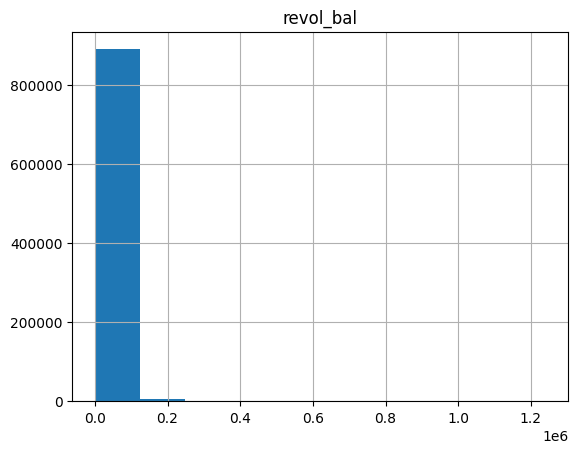

>>> Current breaks:
2000.0,4000.0,22500.0,26500.0,36000.0 



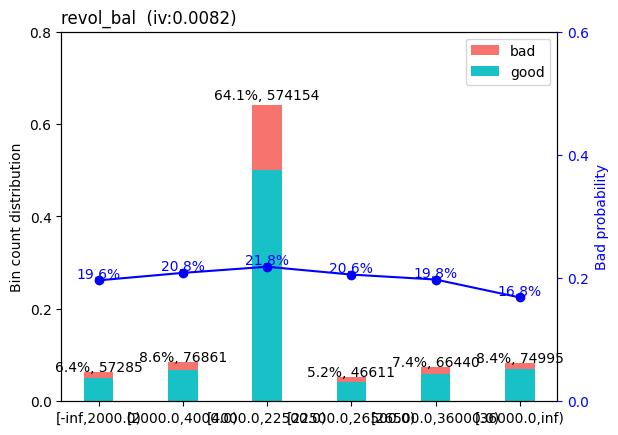

>>> Adjust breaks for (13/15) revol_bal?
1: next 
2: yes 
3: back
Selection: 1
-------- 14/15 revol_util --------
>>> dt[revol_util].describe(): 
count    896346.000000
mean         50.791098
std          24.653577
min           0.000000
25%          32.100000
50%          50.800000
75%          69.800000
max         191.000000
Name: revol_util, dtype: float64 



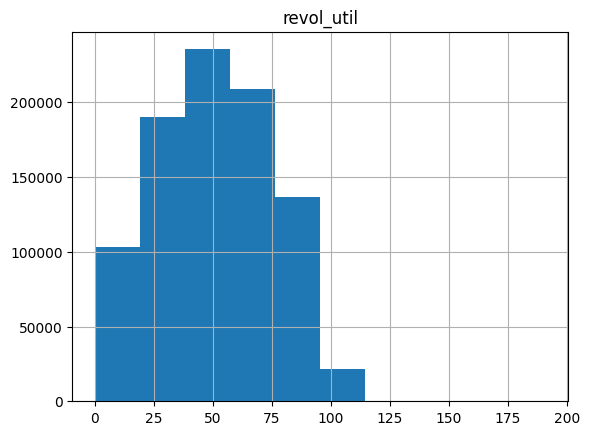

>>> Current breaks:
22.0,38.0,48.0,58.0 



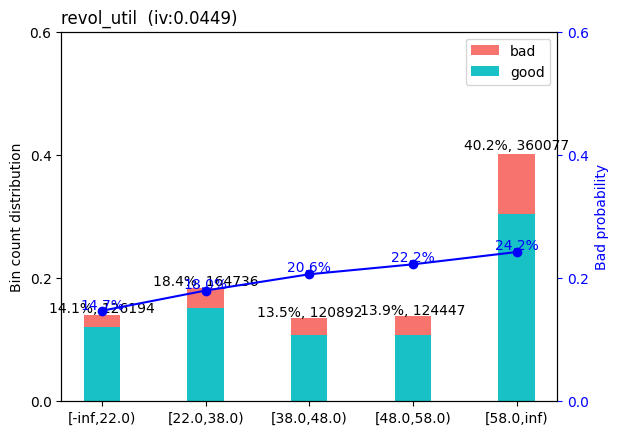

>>> Adjust breaks for (14/15) revol_util?
1: next 
2: yes 
3: back
Selection: 1
-------- 15/15 total_acc --------
>>> dt[total_acc].describe(): 
count    896346.000000
mean         24.207718
std          11.987182
min           2.000000
25%          15.000000
50%          22.000000
75%          31.000000
max         129.000000
Name: total_acc, dtype: float64 



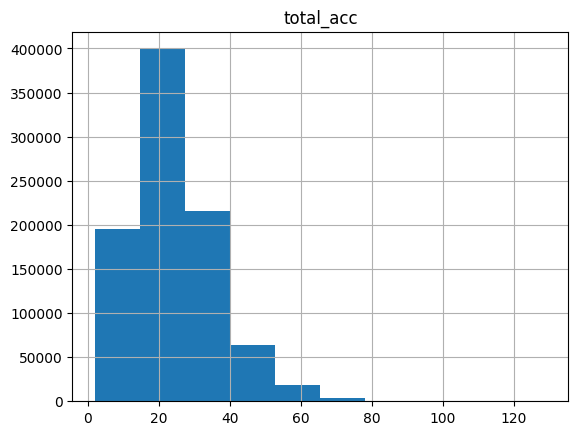

>>> Current breaks:
9.0,13.0,23.0,29.0,33.0,44.0 



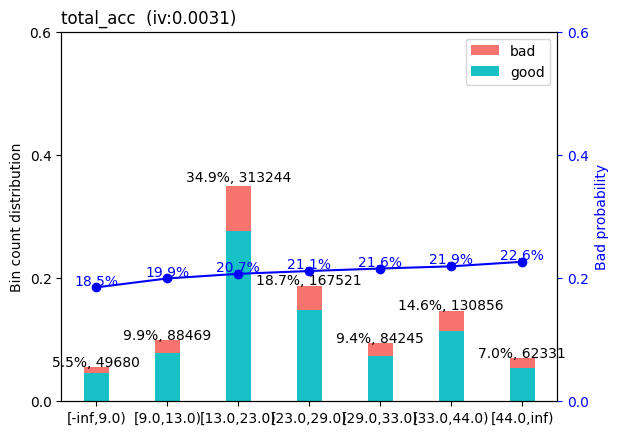

>>> Adjust breaks for (15/15) total_acc?
1: next 
2: yes 
3: back
Selection: 1


In [30]:
breaks_adj = sc.woebin_adj(df_train_no_outliers, "Default", bins_no, adj_all_var=True)

In [31]:
breaks_adj

"{'delinq_2yrs': [1.0,2.0], 'dti': [9.0,12.5,18.0,24.5], 'fico_range_high': [680.0,705.0,720.0,740.0,765.0], 'fico_range_low': [680.0,705.0,720.0,740.0,765.0], 'home_ownership': ['ANY%,%MORTGAGE','OWN','RENT%,%NONE%,%OTHER'], 'inq_last_6mths': [1.0,2.0], 'installment': [160.0,260.0,300.0,340.0,500.0,600.0,660.0], 'loan_amnt': [4500.0,10500.0,16500.0,20000.0,20500.0,25000.0,35000.0], 'open_acc': [6.0,8.0,10.0,11.0], 'pub_rec': [1.0], 'purpose': ['car%,%credit_card','home_improvement%,%major_purchase','house%,%vacation%,%other','wedding%,%medical%,%debt_consolidation%,%moving%,%renewable_energy%,%small_business%,%educational'], 'revol_bal': [2000.0,4000.0,22500.0,26500.0,36000.0], 'revol_util': [22.0,38.0,48.0,58.0], 'term': [' 36 months',' 60 months'], 'total_acc': [9.0,13.0,23.0,29.0,33.0,44.0]}"

## **ADDING NEW VARIABLES:**

In [ ]:
df_train['utilization_per_open_acc'] = df_train['revol_util'] / df_train['open_acc']
df_train['prop_recent_open_acc'] = df_train['acc_open_past_24mths'] / df_train['total_acc']
df_train['prop_active_rev_acc'] = df_train['num_actv_rev_tl'] / df_train['open_acc']
df_train['loan_to_income_ratio'] = df_train['loan_amnt'] / df_train['annual_inc']
df_train['inq_to_recent_open_acc'] = df_train['inq_last_6mths'] / df_train['acc_open_past_24mths']
df_train['utilization_per_open_acc'] = df_train['revol_util'] / df_train['open_acc']

In [ ]:
new_vars = ['utilization_per_open_acc','prop_recent_open_acc','prop_active_rev_acc','loan_to_income_ratio','utilization_per_open_acc', 'dti_per_open_acc', 'inq_to_recent_open_acc']

In [ ]:
bins_trial = sc.woebin(df_train, y='Default',
                 x='loan_to_income_ratio',  # Include only the first 5 variables
                 min_perc_fine_bin=0.01,  # How many bins to cut initially into
                 min_perc_coarse_bin=0.05,  # Minimum percentage per final bin
                 stop_limit=0.02,  # Minimum information value
                 max_num_bin=8,  # Maximum number of bins
                 method='tree'
                 )

[INFO] creating woe binning ...
Binning on 848276 rows and 2 columns in 00:00:17


{'loan_to_income_ratio': <Figure size 432x288 with 2 Axes>}

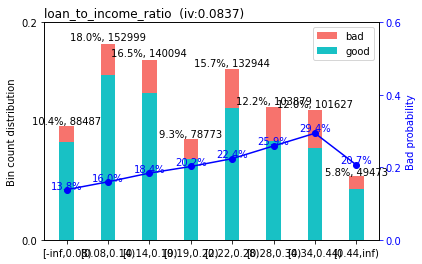

In [ ]:
sc.woebin_plot(bins_trial)

In [ ]:
# Select only numeric columns
numeric_columns = df_train.select_dtypes(include=np.number).columns

# Calculate correlation for numeric columns
correlation_matrix = df_train[numeric_columns].corr()
correlation_with_default = correlation_matrix['Default'].sort_values(ascending=False)

# Print correlations with 'Default'
print(correlation_with_default)


Default                       1.000000
acc_open_past_24mths          0.114895
inq_last_6mths                0.105833
prop_recent_open_acc          0.094468
percent_bc_gt_75              0.093828
bc_util                       0.090949
revol_util                    0.080652
mths_since_recent_inq         0.073785
num_actv_rev_tl               0.064411
num_rev_tl_bal_gt_0           0.063397
prop_active_rev_acc           0.056551
inq_to_recent_open_acc        0.047366
dti                           0.044489
pub_rec                       0.040830
pub_rec_bankruptcies          0.033300
num_op_rev_tl                 0.032329
installment                   0.031738
num_rev_accts                 0.030993
num_actv_bc_tl                0.030488
open_acc                      0.026211
num_sats                      0.025460
total_acc                     0.024499
loan_amnt                     0.023802
bank_dlq                      0.023741
delinq_2yrs                   0.023401
num_bc_tl                